In [178]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import statistics
from functools import reduce

df = pd.read_csv('Data for nominal control chart.csv', index_col = 0)

In [179]:
df

,Length_required,M1,M2,M3,x1,x2,x3,average,R
Sample number,,,,,,,,,
1,35,32,33,33,-3,-2,-2,-2.33,1
2,35,34,34,36,-1,-1,1,-0.33,2
3,35,35,36,35,0,1,0,0.33,1
4,45,42,44,46,-3,-1,1,-1.00,4
5,45,45,45,48,0,0,3,1.00,3
6,45,48,47,48,3,2,3,2.67,1
7,50,52,49,55,2,-1,5,2.00,6
8,50,55,48,49,5,-2,-1,0.67,7
9,50,51,50,52,1,0,2,1.00,2


In [180]:
DF_R_BY_Length_required = df.groupby('Length_required').mean()['R']
DF_R_BY_Length_required

Length_required
35    1.333333
45    2.666667
50    5.000000
Name: R, dtype: float64

In [181]:
R =[]
for i in range(1,df.index.max()+1):
    if i < 4:
        R.append(round(df.at[i,'R']/DF_R_BY_Length_required.at[35],3))
    
    if i > 3 and i < 7:
        R.append(round(df.at[i,'R']/DF_R_BY_Length_required.at[45],3))
        
    if i > 6 and i <10:
        R.append(round(df.at[i,'R']/DF_R_BY_Length_required.at[50],3))
R

[0.75, 1.5, 0.75, 1.5, 1.125, 0.375, 1.2, 1.4, 0.4]

In [182]:
CL_R = sum(R)/len(R)
CL_R

1.0

In [183]:
D4 = 2.575
D3 =0

UCL_R = D4*CL_R
LCL_R = D3*CL_R

# Ranges control chart

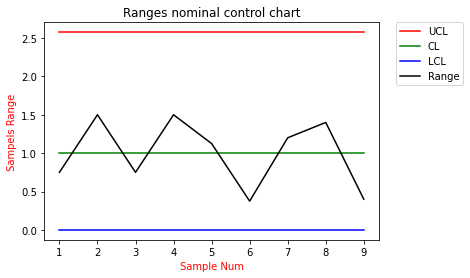

In [184]:
plt.plot( df.index.values , (np.ones(df.index.max())*UCL_R) ,  label = 'UCL' , color = 'r')


plt.plot( df.index.values , (np.ones(df.index.max())*CL_R) ,   label = 'CL', color = 'g')

plt.plot( df.index.values , (np.ones(df.index.max())*LCL_R) ,  label = 'LCL',  color = 'b')

plt.plot( df.index.values , (R) ,    label = 'Range', color = 'k')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel(' Sampels Range ', color = 'r' )
plt.title('Ranges nominal control chart')
plt.xlabel( 'Sample Num', color = 'r' )


plt.show()

In [185]:
DF_R_BY_Length_required = df.groupby('Length_required').mean()['R']

DF_R_BY_Length_required[35]


1.3333333333333333

In [186]:
ranges_avg =[]

for i in range(1,df.index.max()+1):
    if i < 4:
        ranges_avg.append(round(DF_R_BY_Length_required.at[35],3))
    
    if i > 3 and i < 7:
        ranges_avg.append(round(DF_R_BY_Length_required.at[45],3))
        
    if i > 6 and i <10:
        ranges_avg.append(round(DF_R_BY_Length_required.at[50],3))
ranges_avg

[1.333, 1.333, 1.333, 2.667, 2.667, 2.667, 5.0, 5.0, 5.0]

In [187]:
DF_AVG_BY_Length_required['ranges_avg'] = ranges_avg

In [188]:
DF_AVG_BY_Length_required['standard_avg'] = round(((((DF_AVG_BY_Length_required['M1']+
                                              DF_AVG_BY_Length_required['M2']+
                                              DF_AVG_BY_Length_required['M3'])/3)-
                                              DF_AVG_BY_Length_required['Length_required'])/
                                              DF_AVG_BY_Length_required['ranges_avg']),3)
                                              
DF_AVG_BY_Length_required

,Length_required,M1,M2,M3,x1,x2,x3,average,R,standard_avg,ranges_avg
Sample number,,,,,,,,,,,
1,35,32,33,33,-3,-2,-2,-2.33,1,-1.750,1.333
2,35,34,34,36,-1,-1,1,-0.33,2,-0.250,1.333
3,35,35,36,35,0,1,0,0.33,1,0.250,1.333
4,45,42,44,46,-3,-1,1,-1.00,4,-0.375,2.667
5,45,45,45,48,0,0,3,1.00,3,0.375,2.667
6,45,48,47,48,3,2,3,2.67,1,1.000,2.667
7,50,52,49,55,2,-1,5,2.00,6,0.400,5.000
8,50,55,48,49,5,-2,-1,0.67,7,0.133,5.000
9,50,51,50,52,1,0,2,1.00,2,0.200,5.000


In [191]:
A2 = 1.023
CL_AVG = 0
UCL_AVG = A2
LCL_AVG = -A2
STD =A2/3
UL_AVG =  STD
LL_AVG = -STD
UWL_AVG = STD*2
LWL_AVG = -STD*2


# Averages control chart

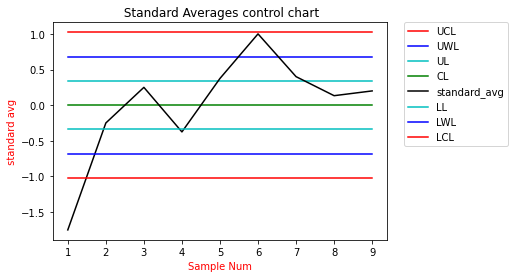

In [192]:
plt.plot( df.index.values , (np.ones(df.index.max())*UCL_AVG) ,  label = 'UCL' , color = 'r')
plt.plot( df.index.values , (np.ones(df.index.max())*UWL_AVG) ,  label = 'UWL' , color = 'b')
plt.plot( df.index.values , (np.ones(df.index.max())*UL_AVG) ,  label = 'UL' , color = 'c')

plt.plot( df.index.values , (np.ones(df.index.max())*CL_AVG) ,   label = 'CL', color = 'g')
plt.plot( df.index.values , (DF_AVG_BY_Length_required['standard_avg']) ,    label = 'standard_avg', color = 'k')

plt.plot( df.index.values , (np.ones(df.index.max())*LL_AVG) ,  label = 'LL' , color = 'c')
plt.plot( df.index.values , (np.ones(df.index.max())*LWL_AVG) ,  label = 'LWL' , color = 'b')
plt.plot( df.index.values , (np.ones(df.index.max())*LCL_AVG) ,  label = 'LCL' , color = 'r')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel(' standard avg ', color = 'r' )
plt.title(' Standard Averages control chart')
plt.xlabel( 'Sample Num', color = 'r' )


plt.show()
